In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [4]:
df = pd.read_csv("../data/raw/ga_webpages_geo.csv", sep=";",index_col=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902722 entries, 0 to 2721
Data columns (total 8 columns):
date               902722 non-null int64
pagePath           902722 non-null object
city               902722 non-null object
longitude          902722 non-null float64
latitude           902722 non-null float64
pageviews          902722 non-null int64
uniquePageviews    902722 non-null int64
exits              902722 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 62.0+ MB


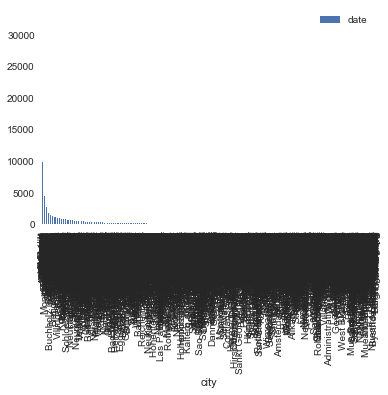

In [6]:
df[["city", "date"]].groupby("city").aggregate('count').sort_values(by="date", ascending=False).plot.bar()

In [7]:
import urllib.request
import re
# from lxml.html.clean import Cleaner

In [8]:
page = urllib.request.urlopen("https://en.wikipedia.org/wiki/List_of_cities_in_Germany_by_population")
page = page.read().decode("utf-8")
page = re.sub(r'<span[^<]*<\/span>', '', page)
# cols = ["Rank", "City", "Population_2015", "Area", "Density", "Land"]
# tags = ['h1','h2','h3','h4','h5','h6',
#        'div', 'span', 
#        'img', 'area', 'map']
# args = {'meta':False, 'safe_attrs_only':False, 'page_structure':False, 
#        'scripts':True, 'style':True, 'links':True, 'remove_tags':tags}
# cleaner = Cleaner(**args)
# cleaner.clean_html(page.decode('utf-8')).text_content()

In [9]:
wiki_tables = pd.read_html(page, header=0)

In [10]:
cities = wiki_tables[1]

In [11]:
cities.tail()

,Rank,City,Pop. 2015[1],Area [km2] [],Density per km2,State (Bundesland)
46,47,Oldenburg,163830,102.98,1575,Lower Saxony
47,48,Leverkusen,163487,78.87,2038,North Rhine-Westphalia
48,49,Osnabrück,162403,119.80,1370,Lower Saxony
49,50,Solingen,158726,89.54,1786,North Rhine-Westphalia
50,Rank,City,Pop. 2015,Area [km2],Density per km2,State (Bundesland)


In [12]:
cities = cities[:-1]
cities.tail()

,Rank,City,Pop. 2015[1],Area [km2] [],Density per km2,State (Bundesland)
45,46,Ludwigshafen am Rhein,164718,77.55,2117,Rhineland-Palatinate
46,47,Oldenburg,163830,102.98,1575,Lower Saxony
47,48,Leverkusen,163487,78.87,2038,North Rhine-Westphalia
48,49,Osnabrück,162403,119.80,1370,Lower Saxony
49,50,Solingen,158726,89.54,1786,North Rhine-Westphalia


In [13]:
cities["Pop2015"] = cities["Pop. 2015[1]"].astype('int')
del cities["Pop. 2015[1]"]

/home/guzzo/anaconda3/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
cities.Rank = cities.Rank.astype('int')
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
Rank                  50 non-null int64
City                  50 non-null object
Area [km2] []         50 non-null object
Density per km2       50 non-null object
State (Bundesland)    50 non-null object
Pop2015               50 non-null int64
dtypes: int64(2), object(4)
memory usage: 2.4+ KB


/home/guzzo/anaconda3/envs/py3/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [15]:
cities.columns = ["Rank", "City", "Area", "Density", "Bundesland", "Pop2015"]

In [16]:
cities.Area = cities.Area.astype('float')
cities.Density = cities.Density.astype('int')
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
Rank          50 non-null int64
City          50 non-null object
Area          50 non-null float64
Density       50 non-null int64
Bundesland    50 non-null object
Pop2015       50 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.4+ KB


/home/guzzo/anaconda3/envs/py3/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### Get table for definition of urban/rural

In [17]:
url = "https://en.wikipedia.org/wiki/List_of_districts_of_Germany"
page = urllib.request.urlopen(url)
page = page.read().decode("utf-8")
page = re.sub(r'<span[^<]*<\/span>', '', page)
# page = re.sub(r'\[[^\]*\]', '', page)

In [18]:
wiki_tables = pd.read_html(page, header=0)

In [19]:
rural_table = wiki_tables[0]

In [20]:
rural_table["Type"] = rural_table["Type (rural/urban)"]
del rural_table["Type (rural/urban)"]

In [21]:
rural_table.replace("\[.\]", '', regex=True, inplace=True)

In [22]:
rural_table.tail()

,District,Land,Capital,Type
400,Würzburg,Bavaria,Würzburg,rural
401,Würzburg,Bavaria,NaN,urban
402,Zollernalbkreis,Baden-Württemberg,Balingen,rural
403,Zweibrücken,Rhineland-Palatinate,NaN,urban
404,Zwickau,Saxony,Zwickau,rural


In [23]:
rural_table["Urban"] = rural_table.Type.apply(lambda x: 1 if x == 'urban' else 0)

In [24]:
rural_table.head()

,District,Land,Capital,Type,Urban
0,Aachen,North Rhine-Westphalia,Aachen,rural,0
1,Aachen,North Rhine-Westphalia,NaN,urban,1
2,Ahrweiler,Rhineland-Palatinate,Bad Neuenahr-Ahrweiler,rural,0
3,Aichach-Friedberg,Bavaria,Aichach,rural,0
4,Alb-Donau,Baden-Württemberg,Ulm,rural,0


In [25]:
rural_table.to_csv("../data/interim/rural_urban.csv", index=False)

## Latest idea: list of kreisfreie Staedte in Deutschland

This is probably a better way to extract "urban" cities out of the whole of German cities

In [26]:
url = "https://de.wikipedia.org/wiki/Liste_der_kreisfreien_St%C3%A4dte_in_Deutschland"
page = urllib.request.urlopen(url)
page = page.read().decode("utf-8")
page = re.sub(r'<span[^<]*<\/span>', '', page)

In [31]:
wiki_tables = pd.read_html(page, header=0)
wiki_table = wiki_tables[1]

In [62]:
urban_cities = wiki_table.Stadt.replace("\[.+\]|\(.+\)", '', regex=True).str.strip().values # , inplace=True)
urban_cities

array(['Aachen', 'Amberg', 'Ansbach', 'Aschaffenburg', 'Augsburg',
       'Baden-Baden', 'Bamberg', 'Bayreuth', 'Berlin', 'Bielefeld',
       'Bochum', 'Bonn', 'Bottrop', 'Brandenburg an der Havel',
       'Braunschweig', 'Bremen', 'Bremerhaven', 'Chemnitz', 'Coburg',
       'Cottbus', 'Darmstadt', 'Delmenhorst', 'Dessau-Roßlau', 'Dortmund',
       'Dresden', 'Duisburg', 'Düsseldorf', 'Eisenach', 'Emden', 'Erfurt',
       'Erlangen', 'Essen', 'Flensburg', 'Frankenthal', 'Frankfurt',
       'Frankfurt am Main', 'Freiburg im Breisgau', 'Fürth',
       'Gelsenkirchen', 'Gera', 'Göttingen', 'Hagen', 'Halle', 'Hamburg',
       'Hamm', 'Hannover', 'Heidelberg', 'Heilbronn', 'Herne', 'Hof',
       'Ingolstadt', 'Jena', 'Kaiserslautern', 'Karlsruhe', 'Kassel',
       'Kaufbeuren', 'Kempten', 'Kiel', 'Koblenz', 'Köln', 'Krefeld',
       'Landau in der Pfalz', 'Landshut', 'Leipzig', 'Leverkusen',
       'Lübeck', 'Ludwigshafen am Rhein', 'Magdeburg', 'Mainz', 'Mannheim',
       'Memmingen', 'Mön

## Finding urban cities in webpage traffic

In [69]:
num_webevents = len(df)
num_webevents

902722

In [70]:
urban_webevents = df.city.apply(lambda x: x in urban_cities).sum()
urban_webevents

289503

In [72]:
num_cities_web = len(df.city.unique())
num_cities_web

3837

In [73]:
num_urban_cities = len(urban_cities)
num_urban_cities

110

In [74]:
df["urban"] = df.city.apply(lambda x: 1 if x in urban_cities else 0)
df.head()

,date,pagePath,city,longitude,latitude,pageviews,uniquePageviews,exits,urban
0,20160315,/,(not set),0.0000,0.0000,96,61,35,0
1,20160315,/,Aachen,6.0839,50.7753,9,9,0,1
2,20160315,/,Aalen,10.0971,48.8367,2,2,0,0
3,20160315,/,Algermissen,9.9696,52.2525,2,2,2,0
4,20160315,/,Alsfeld,9.2692,50.7508,2,2,0,0


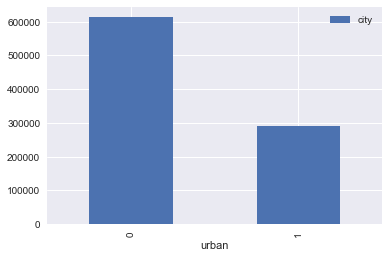

In [89]:
df[["city", "urban"]].groupby("urban").aggregate('count').plot.bar()

In [76]:
kreisfreie_pop = 25E6
german_pop = 82.8E6

In [77]:
kreisfreie_pop, german_pop

(25000000.0, 82800000.0)

In [103]:
rel_dist_webevents = df[["city", "urban"]].groupby("urban").aggregate('count').values/num_webevents
rel_dist_webevents

array([[ 0.67929994],
       [ 0.32070006]])

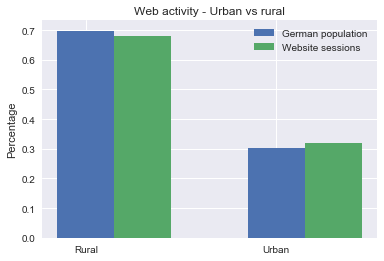

In [125]:
pop_urban_rural = np.array((german_pop-kreisfreie_pop, kreisfreie_pop))/german_pop
plt.bar((0,1), pop_urban_rural, width=0.3, label="German population")
plt.bar((0+0.3,1+0.3), rel_dist_webevents, width=0.3, label="Website sessions")
plt.legend(loc='best')
plt.xticks([0, 1], ["Rural", "Urban"])
plt.ylabel("Percentage")
plt.title("Web activity - Urban vs rural")
plt.savefig("web_urban_rural.png", dpi=300)

In [115]:
import pickle

In [118]:
pickle.dump(urban_cities, open("../data/interim/urban_cities.pkl", 'wb'))

In [119]:
pickle.dump(pop_urban_rural, open("../data/interim/pop_urban_rural.pkl", 'wb'))

In [120]:
pickle.dump(rel_dist_webevents, open("../data/interim/rel_webevents.pkl", 'wb'))